# Data Description

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
DATA_FILE_PATH = "/home/bitunsen4893/BITUN/data"
train_file_df = pd.read_csv(DATA_FILE_PATH + "/train.csv")
test_file_df = pd.read_csv(DATA_FILE_PATH + "/test.csv")
print("Shape of Training file : ({}, {})".format(train_file_df.shape[0], train_file_df.shape[1] ))
print("Shape of Test file : ({}, {})".format(test_file_df.shape[0], test_file_df.shape[1] ))

Shape of Training file : (42000, 785)
Shape of Test file : (28000, 784)


In [4]:
train_file_df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
feature_column_names = [col for col in train_file_df.columns if col.startswith('pixel')]

### Check the distribution of labels

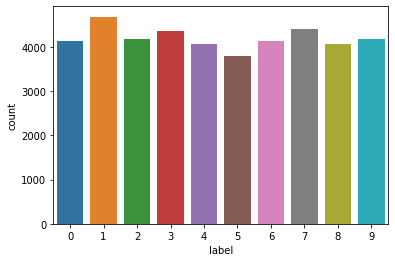

In [6]:
sns.countplot(train_file_df['label'])

Using seaborn's countplot we can easily see that the data is quite balanced. 

### Display couple of images from training dataset

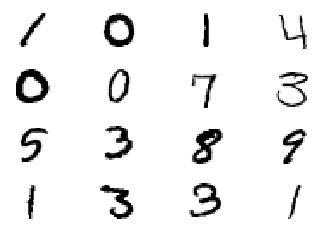

In [7]:
def show_some_images(_df):
    figure = plt.figure()
    num_of_images = 16
    for i in range(num_of_images):
        img_data = []
        for col_name in feature_column_names:
            img_data.append(_df[col_name].iloc[i])
        plt.subplot(4, 4, i+1)
        plt.axis('off')
        img_data = np.array(img_data).reshape(28,28)
        plt.imshow(img_data, cmap='gray_r')

show_some_images(train_file_df)

In [8]:
data_list = [0,1,2,3,4,5,6,7,8,9]
np.array(data_list).reshape(2, 5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [9]:
train_pixels_df = train_file_df[feature_column_names]
print("Shape of Training Pixel DF : ({}, {})".format(train_pixels_df.shape[0], train_pixels_df.shape[1]))
train_labels = train_file_df['label']
print("Shape of Training Label : ({},)".format(train_labels.shape[0]))

Shape of Training Pixel DF : (42000, 784)
Shape of Training Label : (42000,)


In [10]:
train_pixels_df = train_pixels_df/255
train_pixels_df.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_pixels_df.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000860,0.000459,0.000231,0.000079,0.000068,0.000011,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.024756,0.018172,0.012841,0.006901,0.007429,0.001625,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [12]:
train_file_df[feature_column_names].describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


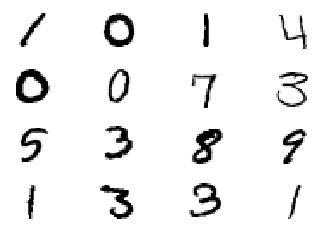

In [13]:
show_some_images(train_pixels_df)

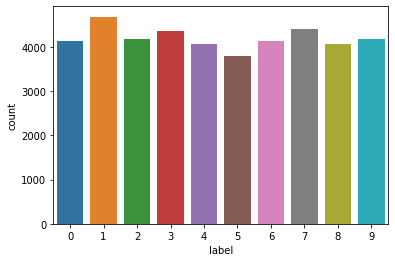

In [14]:
sns.countplot(train_labels)

## Use simple Artificial Neural network

For using simple Artificial Neural network, we will use 28X28 dimension data for each image. So let us reformat each image data using reshape method of numpy.

In [15]:
train_pixels_formated = train_pixels_df.values.reshape(-1,28,28)


In [16]:
# Split the train and the validation set with 20% for validation set
X_train, X_test, y_train, y_test = train_test_split(train_pixels_formated, train_labels, test_size=0.2, random_state=20, stratify=train_labels)
print("Shape of Training Pixel DF : ({}, {}, {})".format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print("Shape of Training Label : ({},)".format(y_train.shape[0]))
print("Shape of Testing Pixel DF : ({}, {}, {})".format(X_test.shape[0], X_test.shape[1], X_test.shape[1]))
print("Shape of Testing Label : ({},)".format(y_test.shape[0]))

Shape of Training Pixel DF : (33600, 28, 28)
Shape of Training Label : (33600,)
Shape of Testing Pixel DF : (8400, 28, 28)
Shape of Testing Label : (8400,)


In [17]:
# Split the train and the validation set with 20% for validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20, stratify=y_train)
print("Shape of Training Pixel DF : ({}, {}, {})".format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print("Shape of Training Label : ({},)".format(y_train.shape[0]))
print("Shape of Testing Pixel DF : ({}, {}, {})".format(X_val.shape[0], X_val.shape[1], X_val.shape[1]))
print("Shape of Testing Label : ({},)".format(y_val.shape[0]))


Shape of Training Pixel DF : (26880, 28, 28)
Shape of Training Label : (26880,)
Shape of Testing Pixel DF : (6720, 28, 28)
Shape of Testing Label : (6720,)


In [18]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [19]:
# Creating a classification MLP with Keras' Sequential API

ann_model = keras.models.Sequential()
ann_model.add(keras.layers.Flatten(input_shape=[28, 28])) # flatten layer
ann_model.add(keras.layers.Dense(300, activation="relu")) # dense layer 1
ann_model.add(keras.layers.Dense(100, activation="relu")) # dense layer 2
ann_model.add(keras.layers.Dense(10, activation="softmax")) # softmax layer

In [20]:
ann_model.summary() # viewing the summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


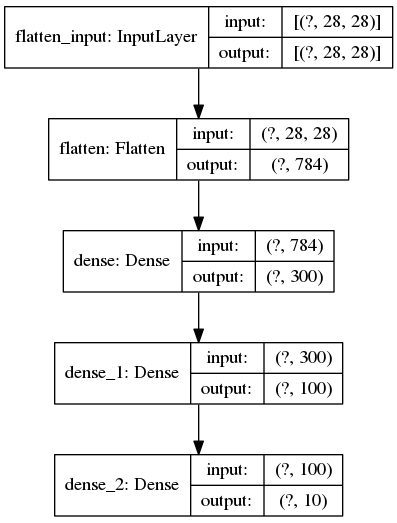

In [21]:
keras.utils.plot_model(ann_model, "my_digit_mnist_model.png", show_shapes=True)

In [22]:
ann_model.compile(loss="sparse_categorical_crossentropy",
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              optimizer="sgd",
             metrics=["accuracy"]
             # metrics=[keras.metrics.sparse_categorical_accuracy, ]
             )

Let us train the model by using 20 epochs and batch size 50. 

In [23]:
ann_history = ann_model.fit(X_train, y_train, epochs=20, batch_size=50,
                    validation_data=(X_val, y_val)) # fitting the model to training data

Train on 26880 samples, validate on 6720 samples
Epoch 1/20
26880/26880 [==============================] - 2s 80us/sample - loss: 1.0846 - accuracy: 0.7373 - val_loss: 0.5403 - val_accuracy: 0.8655
Epoch 2/20
26880/26880 [==============================] - 2s 65us/sample - loss: 0.4351 - accuracy: 0.8828 - val_loss: 0.3946 - val_accuracy: 0.8902
Epoch 3/20
26880/26880 [==============================] - 2s 65us/sample - loss: 0.3517 - accuracy: 0.9002 - val_loss: 0.3462 - val_accuracy: 0.9027
Epoch 4/20
26880/26880 [==============================] - 2s 65us/sample - loss: 0.3132 - accuracy: 0.9103 - val_loss: 0.3142 - val_accuracy: 0.9104
Epoch 5/20
26880/26880 [==============================] - 2s 64us/sample - loss: 0.2862 - accuracy: 0.9167 - val_loss: 0.2958 - val_accuracy: 0.9137
Epoch 6/20
26880/26880 [==============================] - 2s 65us/sample - loss: 0.2663 - accuracy: 0.9230 - val_loss: 0.2787 - val_accuracy: 0.9192
Epoch 7/20
26880/26880 [==============================] -

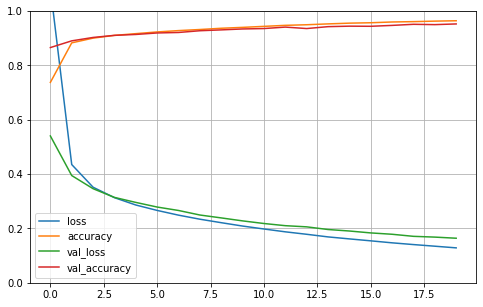

In [24]:
# Plotting the mean training loss and accuracy measured over each epoch
# and the mean validation loss and accuracy measured at the end of each epoch

import pandas as pd

pd.DataFrame(ann_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

**************************************************
<b>IMPORTANT NOTE: Difference between evaluate and predic method in Keras</b>
**************************************************

> evaluate method:
   - The evaluate function at first predicts the output for the given input.
   - Then computes the metrics function specified during the model.compile using the prediction and true values
   - Then it returns the computed metrics value as output.

> predict method:
   - The predict function predicts the output for the given input.
   - Then it returns the predicted output. 
   - No metrics calculation is done in predict method.
   - This method is used in RNN and LSTM where the predicted output is fed as input to the model recursively.

In [25]:
ann_model.evaluate(X_test, y_test) # Evaluating the model

8400/8400 [==============================] - 0s 47us/sample - loss: 0.1537 - accuracy: 0.9568


[0.15374431048475562, 0.95678574]

In [26]:
y_pred = ann_model.predict(X_test) # Evaluating the model
y_pred.shape

(8400, 10)

In [27]:
y_test_list = y_test.tolist()

In [28]:
print("Predicted Number: {}".format(np.argmax(y_pred[1])))
print("Actual Number: {}".format(y_test_list[1]))


Predicted Number: 4
Actual Number: 4


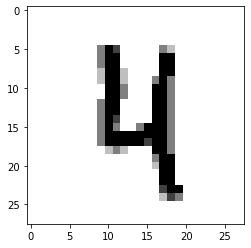

In [29]:
plt.imshow(X_test[1], cmap='gray_r')

Now let us see some results along with the images.

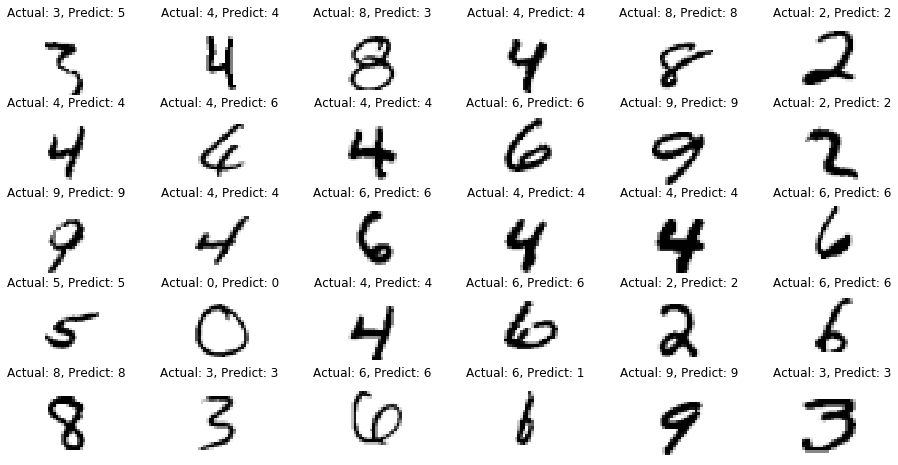

In [30]:
figure = plt.figure(figsize=(16, 8))
num_of_images = 30
for i in range(num_of_images):
    plt.subplot(5, 6, i+1)
    plt.axis('off')
    plt.imshow(X_test[i], cmap='gray_r')
    plt.title("Actual: {}, Predict: {}".format(y_test_list[i], np.argmax(y_pred[i])), fontsize=12)

## Using CNN

As we could see that using simple Artificial Neural network we could achieve 95% accuracy. Let us see if we can improve the accuracy by using Convolutional Neural Network. 

In CNN, based on the definition, it addes initial layers to identify the different properties of images and extract the important features using MaxPooling layer. We will also use DropOut method to add stochastivity in the model which will randomly drop some features. Then the output is fed to the Artificial Neural Network for classification.

In [16]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [19]:
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In Keras, Convolutional Neural Network works on 3 dimension dataset - [width][height][channel]

We have to do a reshape of the dataset to pass the dataset to the CNN model.

In [26]:
train_pixels_formated = train_pixels_df.values.reshape(-1,28,28,1)

In [27]:
train_labels = keras.utils.to_categorical(train_labels, num_classes = 10)

In [29]:
# Split the train and the validation set with 20% for validation set
X_train, X_test, y_train, y_test = train_test_split(train_pixels_formated, train_labels, test_size=0.2, random_state=20, stratify=train_labels)
print("Shape of Training Pixel DF : ({}, {}, {})".format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print("Shape of Training Label : ({},{})".format(y_train.shape[0], y_train.shape[1]))
print("Shape of Testing Pixel DF : ({}, {}, {})".format(X_test.shape[0], X_test.shape[1], X_test.shape[1]))
print("Shape of Testing Label : ({},{})".format(y_test.shape[0], y_test.shape[1]))

Shape of Training Pixel DF : (33600, 28, 28)
Shape of Training Label : (33600,10)
Shape of Testing Pixel DF : (8400, 28, 28)
Shape of Testing Label : (8400,10)


In [30]:
# Split the train and the validation set with 20% for validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20, stratify=y_train)
print("Shape of Training Pixel DF : ({}, {}, {})".format(X_train.shape[0], X_train.shape[1], X_train.shape[2]))
print("Shape of Training Label : ({},{})".format(y_train.shape[0], y_train.shape[1]))
print("Shape of Testing Pixel DF : ({}, {}, {})".format(X_val.shape[0], X_val.shape[1], X_val.shape[1]))
print("Shape of Testing Label : ({},{})".format(y_val.shape[0], y_val.shape[1]))

Shape of Training Pixel DF : (26880, 28, 28)
Shape of Training Label : (26880,10)
Shape of Testing Pixel DF : (6720, 28, 28)
Shape of Testing Label : (6720,10)


In [37]:
# Construct the CNN model

cnn_model = keras.models.Sequential()

cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
cnn_model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = "relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation = "softmax"))

In [38]:
# RMSProp update adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, 
# monotonically decreasing learning rate. We could also have used Stochastic Gradient Descent ('sgd') optimizer, 
# but it is slower than RMSprop.

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [39]:
# Compile the model
cnn_model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

Its better to have a decreasing learning rate during the training to reach efficiently the global minimum of the loss function.

To keep the advantage of the fast computation time with a high LR, i decreased the LR dynamically every X steps (epochs) depending if it is necessary (when accuracy is not improved).

With the ReduceLROnPlateau function from Keras.callbacks, i choose to reduce the LR by half if the accuracy is not improved after 3 epochs.

In [40]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [31]:
epochs = 30 # Turn epochs to 30 to get 0.992 accuracy
batch_size = 86

In [30]:
# Without data augmentation I obtained an accuracy of 0.992
cnn_history = cnn_model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, y_val), verbose = 2)

NameError: name 'cnn_model' is not defined

In [ ]:
cnn_model.evaluate(X_test, y_test) # Evaluating the model

In [28]:
keras.backend.clear_session() # clearing session
np.random.seed(42) # generating random see
tf.random.set_seed(42) # set.seed function helps reuse same set of random variables

In [32]:
# Construct the CNN model

cnn_model_2 = keras.models.Sequential()

cnn_model_2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
cnn_model_2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
cnn_model_2.add(MaxPool2D(pool_size=(2,2)))
cnn_model_2.add(Dropout(0.25))


cnn_model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model_2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
cnn_model_2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
cnn_model_2.add(Dropout(0.25))


cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(256, activation = "relu"))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(10, activation = "softmax"))

In [33]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [34]:
# Compile the model
cnn_model_2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [35]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
# Without data augmentation I obtained an accuracy of 0.992
cnn_2_history = cnn_model_2.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, y_val), verbose = 2)

Train on 26880 samples, validate on 6720 samples
Epoch 1/30
26880/26880 - 57s - loss: 0.3066 - accuracy: 0.9014 - val_loss: 0.0561 - val_accuracy: 0.9810
Epoch 2/30
26880/26880 - 56s - loss: 0.0777 - accuracy: 0.9765 - val_loss: 0.0517 - val_accuracy: 0.9841
Epoch 3/30
26880/26880 - 57s - loss: 0.0548 - accuracy: 0.9837 - val_loss: 0.0563 - val_accuracy: 0.9844
Epoch 4/30


In [ ]:
cnn_model_2.evaluate(X_test, y_test) # Evaluating the model